
@Author: Suresh<br>
@Date: 02-10-2024<br>
@Last modified by: Suresh<br>
@Last modified Date: 02-10-2024 <br>
@Title: Multiple Linear Regression Predict Aperent Temperature<br><br>


### Importing Libraries

In [65]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats


### Load Dataset

In [66]:

df = pd.read_csv(r'C:\Users\Suresh\Desktop\pythonBl\machine_learning\Regression\MultipleLinearRegression\weatherHistory.csv')
df.head()



,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Feature Selection
### Selecting features and the target variable

In [67]:

features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
X = df[features]
y = df['Apparent Temperature (C)']


### Selected Features

In [68]:
X

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [69]:
X.describe()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,1.000000,63.852600,359.000000,16.100000,1046.380000


In [70]:
y

0         7.388889
1         7.227778
2         9.377778
3         5.944444
4         6.977778
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Apparent Temperature (C), Length: 96453, dtype: float64

# Check for missing values in the features and target

In [71]:

print(X.isnull().sum())
print(y.isnull().sum())

Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Pressure (millibars)      0
dtype: int64
0


### Checking for Outliers and Removing it

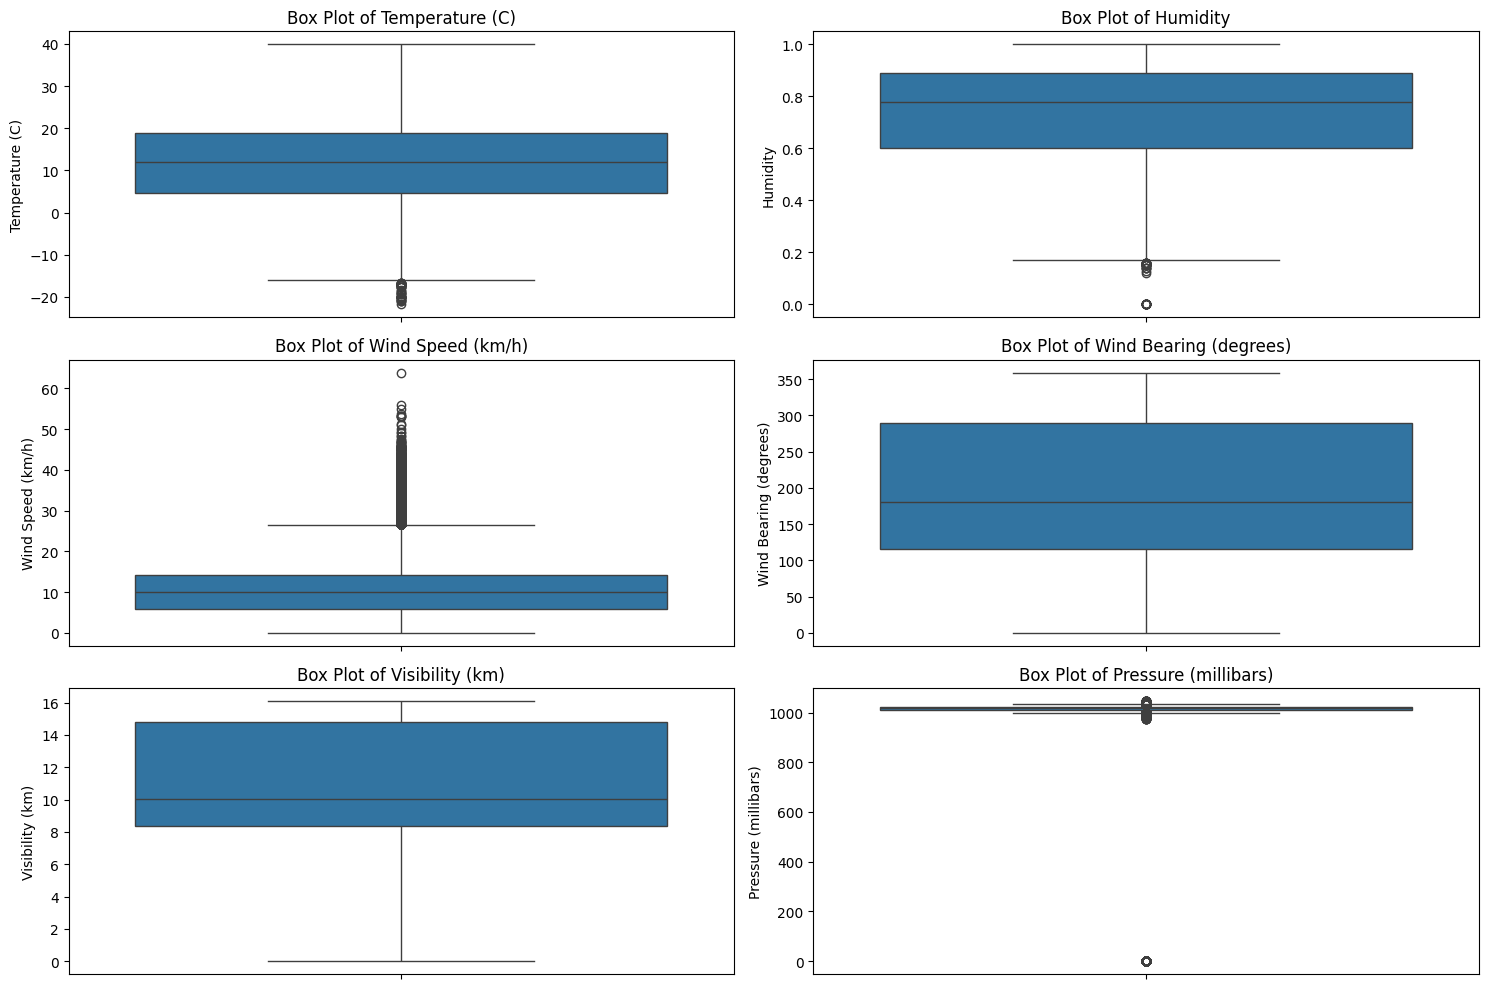

In [72]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)  # Creating a subplot for each feature
    sns.boxplot(y=df[feature])  # Create a boxplot
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()  # Adjust layout
plt.show()

Assuming X is your feature set (DataFrame) and y is your target variable (Series)
Calculate Q1 (25th percentile) and Q3 (75th percentile)

In [73]:

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (X < lower_bound) | (X > upper_bound)

data_no_outliers = X[~outliers.any(axis=1)]
y_no_outliers = y[~outliers.any(axis=1)]

# Display the number of records removed
print(f'Removed outliers, remaining records: {data_no_outliers.shape[0]}')

# Splitting the cleaned dataset into training and testing sets
X_clean = data_no_outliers.values
y_clean = y_no_outliers.values


Removed outliers, remaining records: 89269


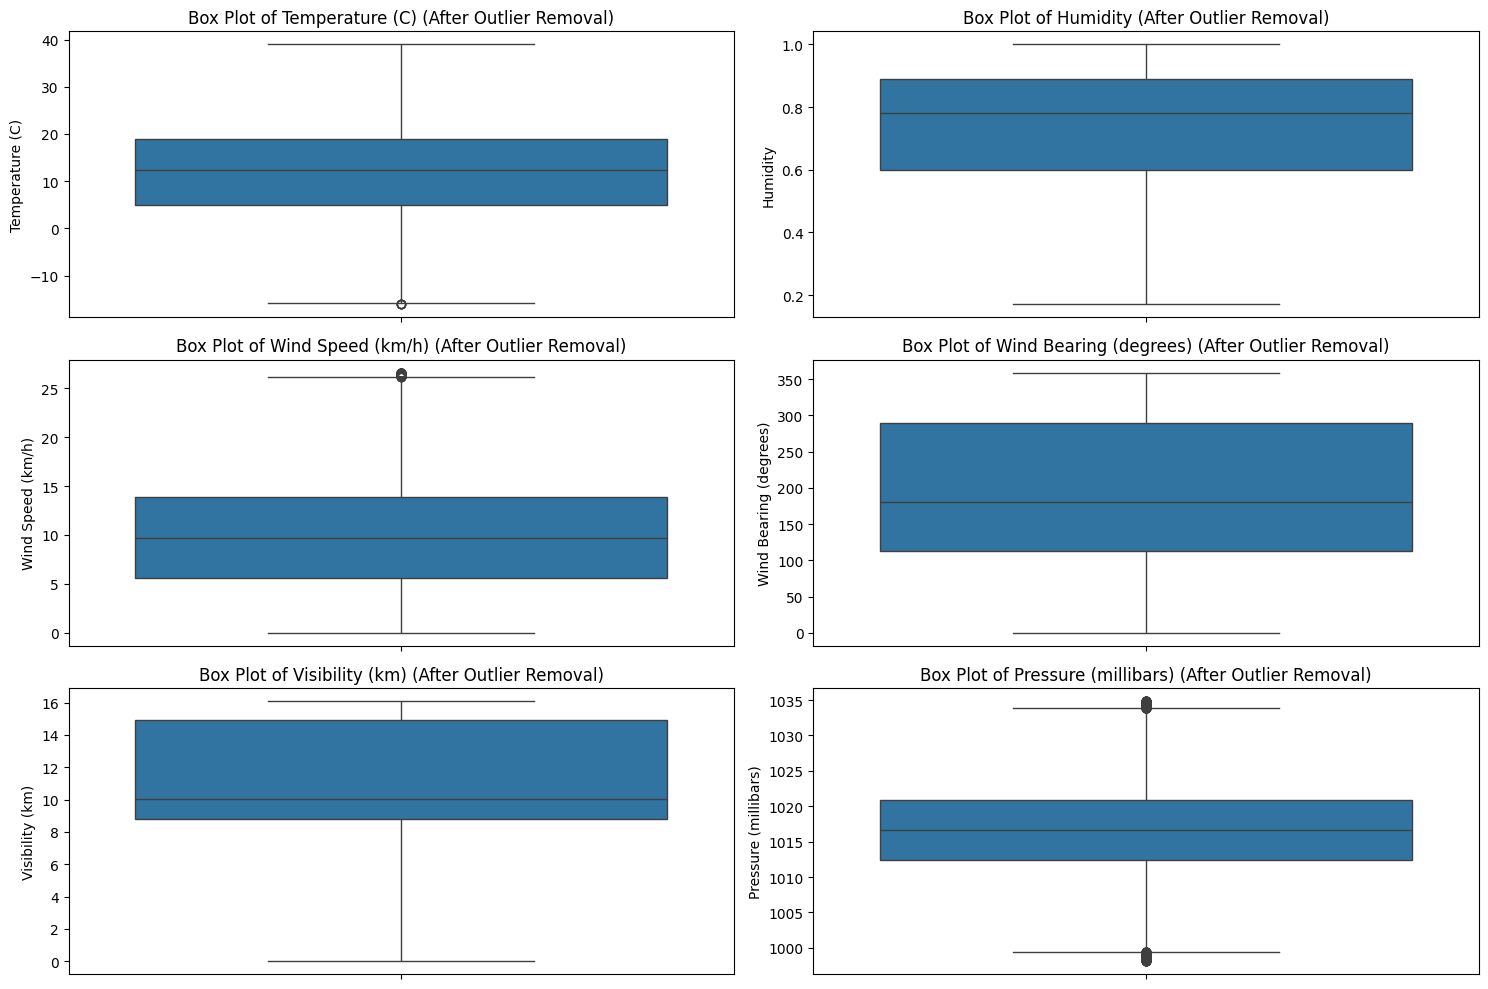

In [74]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)  # Creating a subplot for each feature
    sns.boxplot(y=data_no_outliers[feature])  # Create a boxplot
    plt.title(f'Box Plot of {feature} (After Outlier Removal)')
    plt.ylabel(feature)

plt.tight_layout() 
plt.show()

###  Splitting the cleaned dataset into training and testing sets

In [75]:

X_clean = data_no_outliers.values
y_clean = y_no_outliers.values

### Checking Correlation                            
                                                              Heatmap
 Convert the cleaned data back to a DataFrame

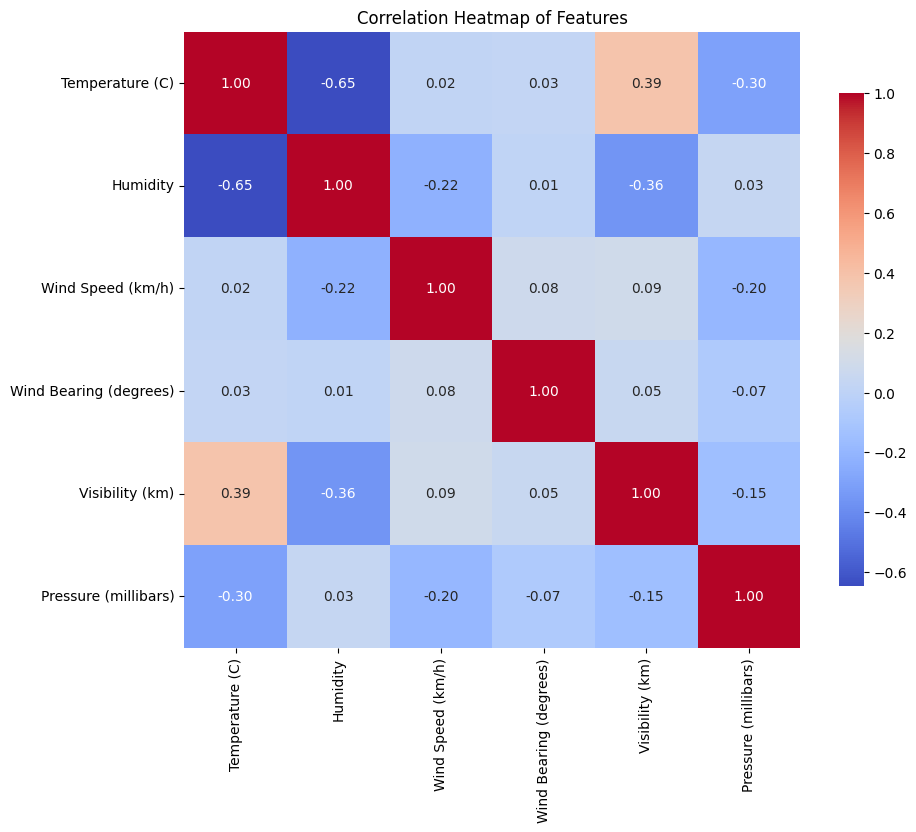

In [76]:

X_clean = pd.DataFrame(X_clean, columns=features)

correlation_matrix = X_clean.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features')
plt.show()


### Spliting and Scaling the features

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
X_test_scaled

array([[ 0.80461612,  1.05075232, -0.40768579, -0.57313847, -0.28644291,
        -0.34030885],
       [-0.33760691, -1.50486186,  0.3846116 , -1.73968447,  1.22252693,
         1.94822052],
       [-0.89167909, -1.30041273, -1.05367043, -1.33839265,  0.18052729,
         1.56951107],
       ...,
       [-0.47509672,  0.4885172 ,  2.04926431,  0.7800549 ,  1.28813432,
        -1.6820646 ],
       [ 0.80696637, -0.07371792,  0.01468878,  1.41465593, -0.0124356 ,
        -1.60809791],
       [ 0.23526729, -0.89151446, -1.29660482, -1.63702843, -0.11277631,
         0.23367266]])

### Model Selection
 Creating and training the Linear Regression model
  Making predictions on the test set

In [79]:

model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

### Model Performance

Mean Squared Error: 1.0140724654379838
R^2 Score: 0.990902893896869


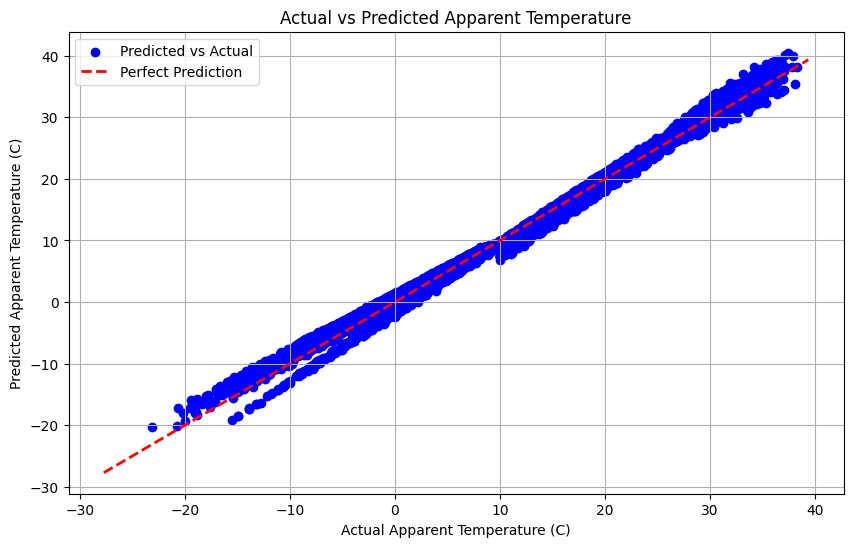

In [80]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Apparent Temperature')
plt.xlabel('Actual Apparent Temperature (C)')
plt.ylabel('Predicted Apparent Temperature (C)')
plt.legend()
plt.grid()
plt.show()